# **Deep Learning Project**
Done by: <br>
- Ana Farinha | 20211514
- Ana Reias | 20211631
- Beatriz Barreto | 20211547
- Inês Graça | 20211598
- Mariana Neto | 20211527


In [ ]:
# Question: Augmentation only in train data or also in validation (professor does it)

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# See what we are using
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

#
import pandas as pd
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import data

Import csv file

In [ ]:
metadata_df = pd.read_csv("/content/drive/MyDrive/ProjectDL23_24/HAM10000_metadata.csv")
metadata_df = metadata_df.set_index('image_id')
metadata_df

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...
ISIC_0033084,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033550,HAM_0002867,akiec,histo,40.0,male,abdomen
ISIC_0033536,HAM_0002867,akiec,histo,40.0,male,abdomen


In [ ]:
train_images_DIR = "/content/drive/MyDrive/ProjectDL23_24/train"
test_images_DIR = "/content/drive/MyDrive/ProjectDL23_24/test"

In [ ]:
def resize_and_create_arrays(directory):
  ## Define the X to store the arrays of images
  X=[]
  ## Define Y to store the labels of the images
  y=[]
  for img in tqdm(os.listdir(directory)):
    path = os.path.join(directory, img)
    # Get label and append to list
    y.append(metadata_df.at[img[:-4], 'dx'])
    # Apply image transformations
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    # Resize because of RAM
    img = cv2.resize(img, (150, 112))
    # Append to list
    X.append(np.array(img))
  # Return X and y
  return X, y

Import and resize images

In [ ]:
# Resize images and create X and y arrays for train directory
X_train, y_train = resize_and_create_arrays(train_images_DIR)

100%|██████████| 7511/7511 [05:37<00:00, 22.26it/s]


In [ ]:
# Resize images and create X and y arrays for test directory
X_test, y_test = resize_and_create_arrays(test_images_DIR)

100%|██████████| 2504/2504 [01:53<00:00, 22.09it/s]


In [ ]:
# Convert X and y to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print("Resized images and created X and y arrays.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Resized images and created X and y arrays.
X_train shape: (7511, 112, 150, 3)
y_train shape: (7511,)
X_test shape: (2504, 112, 150, 3)
y_test shape: (2504,)


In [ ]:
# Convert the labels into a numerical format
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

# Resclaing of pixels
X_train = X_train/255
X_test = X_test/255

# Modeling

Split dataset

In [ ]:
# Train validation split
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

Build the model

In [ ]:
model = Sequential()
model.add(Conv2D(20, kernel_size = (2, 2), padding='same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(40, kernel_size = (2, 2), padding='same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60, kernel_size = (2, 2), padding='same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(258, activation='relu'))
model.add(Dense(124, activation='relu'))
model.add(Dense(7, activation='softmax'))

# compile model
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# notebook 15
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

Train model

In [ ]:
epochs_no = 5

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        validation_split=0.2)


datagen.fit(X_train)

model.fit(datagen.flow(X_train, y_train, batch_size=128, subset="training"), epochs=epochs_no, validation_data=datagen.flow(X_train,y_train,batch_size=32, subset="validation")
          )

Epoch 1/5
38/38 [==============================] - 130s 3s/step - loss: 1.1189 - accuracy: 0.6551 - val_loss: 1.0383 - val_accuracy: 0.6619
Epoch 2/5
38/38 [==============================] - 126s 3s/step - loss: 0.9777 - accuracy: 0.6724 - val_loss: 0.9155 - val_accuracy: 0.6694
Epoch 3/5
38/38 [==============================] - 123s 3s/step - loss: 0.9287 - accuracy: 0.6757 - val_loss: 0.8806 - val_accuracy: 0.6636
Epoch 4/5
38/38 [==============================] - 116s 3s/step - loss: 0.8879 - accuracy: 0.6825 - val_loss: 0.8685 - val_accuracy: 0.6628
Epoch 5/5
38/38 [==============================] - 122s 3s/step - loss: 0.8508 - accuracy: 0.6909 - val_loss: 0.8165 - val_accuracy: 0.6953


In [ ]:
history = model.history

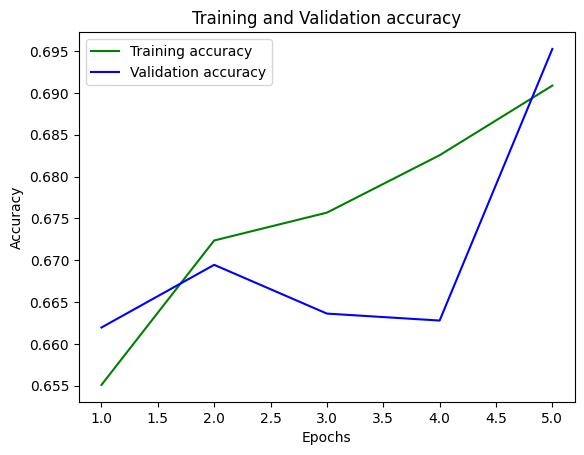

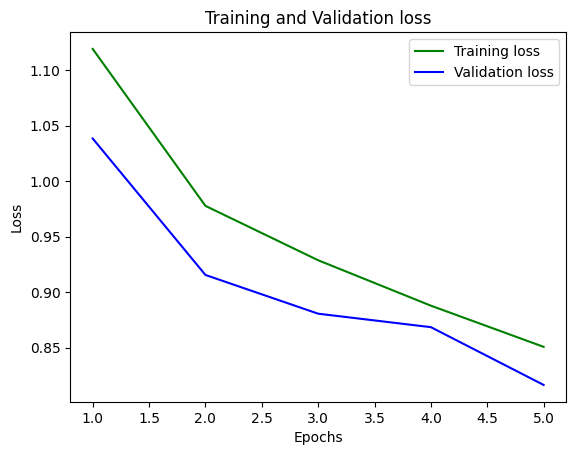

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epochs_no+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epochs_no+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model evaluation

In [ ]:
def count_y(y):
    # Use numpy.unique with return_counts=True to get unique values and their counts
    unique_values, counts = np.unique(y, return_counts=True)

    # Combine unique values and their counts
    frequency = dict(zip(unique_values, counts))

    # Print the frequency of each number
    for value, count in frequency.items():
        print(f"Number {value} appears {count} times.")

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, labels, labels)
    ax = sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}, square=True, cbar=False, fmt='g')
    ax.set_ylim(0, len(labels))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    ax.invert_yaxis()  # optional
    plt.show()

Evaluate on validation data

In [ ]:
# Make predictions
y_pred = model.predict(X_val)
# Convert predictions and true labels back to original labels
y_pred = np.argmax(y_pred, axis=1)

47/47 [==============================] - 6s 121ms/step


In [ ]:
count_y(y_pred)

Number 0 appears 2 times.
Number 1 appears 37 times.
Number 2 appears 241 times.
Number 4 appears 125 times.
Number 5 appears 1097 times.
Number 6 appears 1 times.


In [ ]:
count_y(y_val)

Number 0 appears 49 times.
Number 1 appears 77 times.
Number 2 appears 165 times.
Number 3 appears 17 times.
Number 4 appears 167 times.
Number 5 appears 1006 times.
Number 6 appears 22 times.


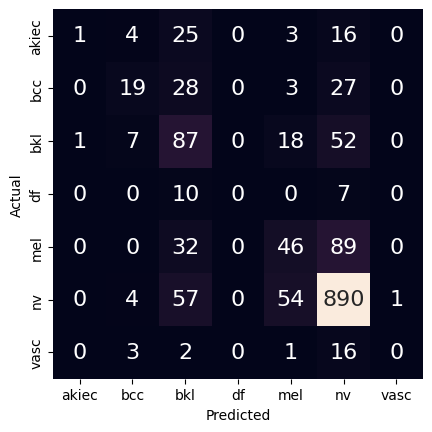

In [ ]:
plot_confusion_matrix(y_val, y_pred)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_val, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        49
           1       0.51      0.25      0.33        77
           2       0.36      0.53      0.43       165
           3       0.00      0.00      0.00        17
           4       0.37      0.28      0.32       167
           5       0.81      0.88      0.85      1006
           6       0.00      0.00      0.00        22

    accuracy                           0.69      1503
   macro avg       0.36      0.28      0.28      1503
weighted avg       0.67      0.69      0.67      1503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluate on test dataset

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
# Convert predictions and true labels back to original labels
y_pred = np.argmax(y_pred, axis=1)

79/79 [==============================] - 11s 137ms/step


In [ ]:
count_y(y_pred)

Number 0 appears 3 times.
Number 1 appears 54 times.
Number 2 appears 384 times.
Number 4 appears 187 times.
Number 5 appears 1873 times.
Number 6 appears 3 times.


In [ ]:
count_y(y_test)

Number 0 appears 82 times.
Number 1 appears 129 times.
Number 2 appears 275 times.
Number 3 appears 29 times.
Number 4 appears 278 times.
Number 5 appears 1676 times.
Number 6 appears 35 times.


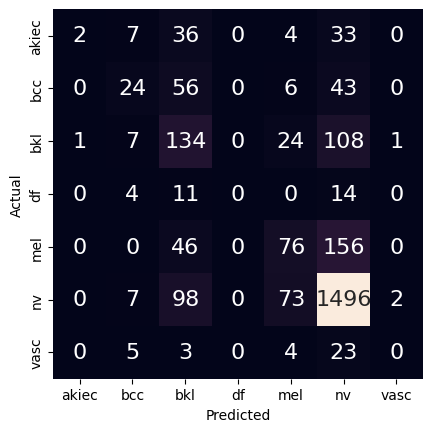

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.02      0.05        82
           1       0.44      0.19      0.26       129
           2       0.35      0.49      0.41       275
           3       0.00      0.00      0.00        29
           4       0.41      0.27      0.33       278
           5       0.80      0.89      0.84      1676
           6       0.00      0.00      0.00        35

    accuracy                           0.69      2504
   macro avg       0.38      0.27      0.27      2504
weighted avg       0.66      0.69      0.66      2504



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
